**Otras formas de analizar el supuesto de la clase pasada (linealidad y cambio estructural)**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [2]:
data=pd.read_csv(r"C:\Users\juaaceve\Downloads\Advanced-Econometrics-MSc--master\Advanced-Econometrics-MSc--master\Bases de datos\GujaratiPorter71.txt", delimiter="\t")
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


In [4]:
modelo=sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR", "TFR"]]))
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     59.17
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           6.46e-18
Time:                        10:19:47   Log-Likelihood:                -323.43
No. Observations:                  64   AIC:                             654.9
Df Residuals:                      60   BIC:                             663.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.3067     32.892      5.117      0.0

**Supuesto de Cambio Estructural**

In [6]:
residuos= resultados.resid

cambio_estructural = sms.breaks_cusumolsresid(residuos)
nombres = ["Estadístico", "P-valor", "Valores Críticos"]

In [7]:
pd.DataFrame({"CUSUM" : cambio_estructural}, index=nombres) #H0 = No hay cambio estructural

,CUSUM
Estadístico,0.403667
P-valor,0.996802
Valores Críticos,"[(1, 1.63), (5, 1.36), (10, 1.22)]"


In [8]:
valores_estimados= resultados.predict()

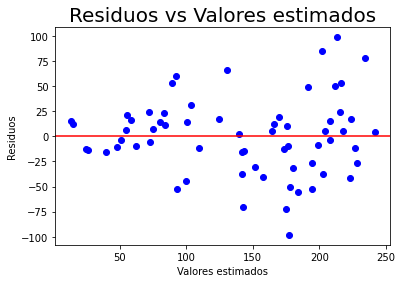

In [10]:
fig,ax=plt.subplots()
ax.scatter(valores_estimados,residuos,color = "blue")
ax.set_xlabel("Valores estimados")
ax.set_ylabel("Residuos")
ax.set_title("Residuos vs Valores estimados", fontsize = 20)
ax.axhline(color = "red")
plt.show()

**Supuesto de Linealidad**

In [13]:
resultados_linealidad = sms.linear_harvey_collier(resultados)
nombres = ["Estadistico","p-valor"]
pd.Series(resultados_linealidad, index = nombres)

# H0 = media 0 error

Estadistico   -0.306749
p-valor        0.760097
dtype: float64

In [14]:
pd.DataFrame(pd.Series(resultados_linealidad, index = nombres), columns = ["Harvey-Collier"])

,Harvey-Collier
Estadistico,-0.306749
p-valor,0.760097


In [15]:
# Otra forma de hacerlo es 
pd.DataFrame({"Harvey-Collier":resultados_linealidad}, index =nombres)

,Harvey-Collier
Estadistico,-0.306749
p-valor,0.760097


In [16]:
resultados_rainbow= sms.linear_rainbow(resultados) 

In [17]:
nombres = ["Estadístico","p-valor"]

In [18]:
pd.DataFrame({"Rainbow":resultados_rainbow}, index = nombres)

,Rainbow
Estadístico,0.627264
p-valor,0.898465


In [19]:
np.mean(residuos)

-2.4424906541753444e-15

**Supuesto 4: Homoscedasticidad**

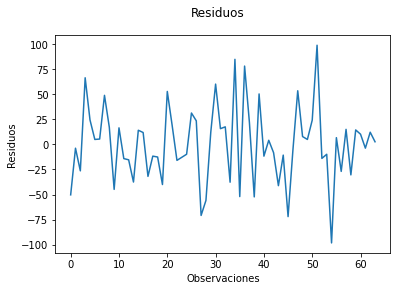

In [20]:
fig, ax = plt.subplots()
fig.suptitle("Residuos")
ax.plot(residuos) 
ax.set_xlabel("Observaciones")
ax.set_ylabel("Residuos")
plt.show()

In [21]:
explicativas = resultados.model.exog
resultados_test = sms.het_breuschpagan(residuos, explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(resultados_test, nombres_test)

Estadístico LM    6.353684
P-value LM        0.095615
Estadístico F     2.204368
P-value F         0.096831
dtype: float64

In [22]:
pd.DataFrame({"Breush Pagan":resultados_test}, index = nombres_test)

,Breush Pagan
Estadístico LM,6.353684
P-value LM,0.095615
Estadístico F,2.204368
P-value F,0.096831


In [23]:
pd.DataFrame(pd.Series(resultados_test, nombres_test), columns = ["BreushPagan"])

,BreushPagan
Estadístico LM,6.353684
P-value LM,0.095615
Estadístico F,2.204368
P-value F,0.096831


In [24]:
test_white = sms.het_white(residuos,explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(test_white, index = nombres_test)

Estadístico LM    7.253524
P-value LM        0.610742
Estadístico F     0.766940
P-value F         0.646936
dtype: float64

**Supuesto de No Autocorrelación**

In [26]:
test_dw = sms.durbin_watson(residuos)
nombres_dw = ["Estadístico DW"]
pd.Series(test_dw, nombres_dw) 
# Como test_dw > 1.96 entonces no hay evidenciaa estadística de que los términos de error están autocorrelacionad

Estadístico DW    2.170318
dtype: float64

In [29]:
test_breush = sms.acorr_breusch_godfrey(resultados, nlags=2)
pd.Series(test_breush, index = nombres_test)

Estadístico LM    0.648268
P-value LM        0.723153
Estadístico F     0.296752
P-value F         0.744350
dtype: float64

In [33]:
test_jungbox= sms.acorr_ljungbox(residuos, lags=1, boxpierce=True)
nombres_jungbox = ["Estadístico LB", "p-value LB", "Estadístico BP", "p-value BP"]
test_jungbox

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.656578,0.417771,0.626734,0.428556


**Supuesto de normalidad**

In [ ]:
test_jb= sms.____________(________)
nombres_jb = ["JB", "p-value","Asimetría","Curtosis"]
pd.Series(________, index =_______)

In [ ]:
test_ad = sms._________(______)
nombres_ad=["AD","p-valor AD"]
pd.Series(__________, index = _____)

In [ ]:
test_ks= sms._________._________(___________)
nombres_ks = ["KS", "p-valor KS"]
pd.Series(________, index = _______)

In [ ]:
fig, ax = plt.subplots()
probplot = sm.________(________)
probplot.________(_______, __________)
ax.____________("QQ Plot", _________)
print()

**Funciones de Probabilidad (Acumulada)**

In [ ]:
x = np.______(_________)
n = x._____ 
y = np.arange(1, n+1) / n 

In [ ]:
residuos_teoricos = np.______.______(loc = np.______(______),
scale = np.______(______),
size = 10000)

In [ ]:
x_teor = np._____(_______)
n_teor = x_teor._______
y_teor = np.arange(1, n_teor+1) / n_teor

In [ ]:
fig, ax = plt.subplots()
ax.________(_______, ________, color = "red")
ax.________(_______,______, color = "blue")
plt.show()